In [2]:
import numpy as np      
import pandas as pd     
import os
import tensorflow as tf
import keras_preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
tf.__version__

'1.14.0'

In [3]:
from keras.layers import Convolution2D

In [4]:
from keras.layers import MaxPooling2D

In [5]:
from keras.layers import Dense

In [6]:
from keras.layers import Flatten

In [7]:
from keras.models import Sequential

In [8]:
model = Sequential()

In [9]:
model.add(Convolution2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 3) ))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Convolution2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 3) ))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.add(Convolution2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 3) ))

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
model.add(Convolution2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 3) ))

In [16]:
model.add(MaxPooling2D(pool_size=(2, 2),))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=256, activation='relu'))

In [19]:
model.add(Dense(units=128, activation='relu'))

In [20]:
model.add(Dense(units=128, activation='relu'))

In [21]:
model.add(Dense(units=128, activation='relu'))

In [22]:
model.add(Dense(units=10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)         

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'C://Users//acer//Desktop//New Researchers//Kaggle//Tomato//New Plant Diseases Dataset(Augmented)//Train',
         target_size=(64, 64),
         batch_size=32,
         class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'C://Users//acer//Desktop//New Researchers//Kaggle//Tomato//New Plant Diseases Dataset(Augmented)//valid',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [26]:
history = model.fit(
        training_set,
        steps_per_epoch=800,
        epochs=25,
        validation_data=test_set,
        validation_steps=80)


Epoch 1/25
800/800 [==============================] - 104s 130ms/step - loss: 1.5144 - accuracy: 0.4456 - val_loss: 1.2976 - val_accuracy: 0.5754
Epoch 2/25
800/800 [==============================] - 100s 126ms/step - loss: 0.7885 - accuracy: 0.7140 - val_loss: 0.8027 - val_accuracy: 0.7469
Epoch 3/25
800/800 [==============================] - 108s 136ms/step - loss: 0.5831 - accuracy: 0.7924 - val_loss: 0.3400 - val_accuracy: 0.7656
Epoch 4/25
800/800 [==============================] - 105s 131ms/step - loss: 0.4571 - accuracy: 0.8391 - val_loss: 0.3142 - val_accuracy: 0.8368
Epoch 5/25
800/800 [==============================] - 96s 120ms/step - loss: 0.4003 - accuracy: 0.8579 - val_loss: 0.4286 - val_accuracy: 0.8129
Epoch 6/25
800/800 [==============================] - 98s 122ms/step - loss: 0.3489 - accuracy: 0.8769 - val_loss: 0.6788 - val_accuracy: 0.7990
Epoch 7/25
800/800 [==============================] - 95s 119ms/step - loss: 0.3260 - accuracy: 0.8837 - val_loss: 0.4260 - v

In [27]:
model.save("tomato_cnn.h5")

In [28]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

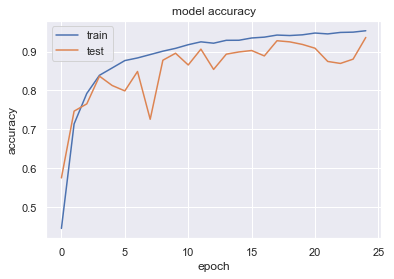

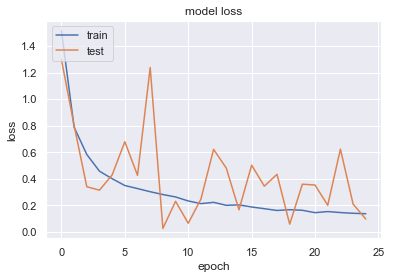

In [29]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
model.evaluate(test_set)

144/144 [==============================] - 7s 47ms/step


[0.36925259232521057, 0.9378407597541809]

In [2]:
import wandb
wandb.init()

ModuleNotFoundError: No module named 'six.moves.collections_abc'

In [3]:
import tensorflow as tf


In [4]:
assert tf.test.is_gpu_available()
assert tf.test.is_built_with_cuda()


AssertionError: 

In [5]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
    

Please install GPU version of TF
